<a href="https://colab.research.google.com/github/Durgesh8166/streamlit-book-recommender/blob/main/Book_recomndation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ra4u12/bookrecommendation")

print("Path to dataset files:", path)

100%|██████████| 24.6M/24.6M [00:00<00:00, 53.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ra4u12/bookrecommendation/versions/1


In [ ]:
import os

print(os.listdir(path))


['BX-Books.csv', 'BX-Book-Ratings.csv', 'BX-Users.csv']


In [ ]:
import pandas as pd
import os

books = pd.read_csv(os.path.join(path, "BX-Books.csv"), sep=';', encoding='latin-1', on_bad_lines='skip')
ratings = pd.read_csv(os.path.join(path, "BX-Book-Ratings.csv"), sep=';', encoding='latin-1', on_bad_lines='skip')
users = pd.read_csv(os.path.join(path, "BX-Users.csv"), sep=';', encoding='latin-1', on_bad_lines='skip')


/tmp/ipython-input-3-1351234463.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(os.path.join(path, "BX-Books.csv"), sep=';', encoding='latin-1', on_bad_lines='skip')


In [ ]:

books.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books.shape

(271360, 8)

In [ ]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
print("Books missing:\n", books.isnull().sum())

Books missing:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [ ]:
books=books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
books.rename(columns={
     'Book-Title':'title',
     'Book-Author':'author',
     'Year-Of-Publication':'year',
     'Publisher':'publisher',
     'Image-URL-L':'img_url'},inplace=True)
books.head()

/tmp/ipython-input-9-1059296553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns={


,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Now load the second dataframe users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users.shape

(278858, 3)

In [ ]:
users.rename(columns={
     'User-ID':'user_id',
     'Location':'location',
     'Age':'age'},inplace=True)
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# Now load the second dataframe rating
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
print("Ratings missing:\n", ratings.isnull().sum())
print("Users missing:\n", users.isnull().sum())


Ratings missing:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Users missing:
 user_id          0
location         0
age         110762
dtype: int64


In [ ]:
print(books.duplicated().sum())
print(ratings.duplicated().sum())
print(users.duplicated().sum())



0
0
0


In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
rating_count=ratings['User-ID'].value_counts()

In [ ]:
# Lets store users who had at least rated more than 100 books
rating_count=rating_count[rating_count>=100]
rating_count

,count
User-ID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
219951,100
62239,100
160410,100


In [ ]:
rating_count.shape

(1847,)

In [ ]:
y=rating_count.index
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
        65663, 175559,  64015,  71612, 116866, 219951,  62239, 160410, 160414,
       160409],
      dtype='int64', name='User-ID', length=1847)

In [ ]:
ratings = ratings[ratings['User-ID'].isin(y)]
ratings

,User-ID,ISBN,Book-Rating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0
...,...,...,...
1149633,276680,1884910033,0
1149634,276680,1888173408,7
1149635,276680,1888173564,8
1149636,276680,1888173572,0


In [ ]:
# Now join ratings with books

ratings_with_books = ratings.merge(books, on='ISBN')
ratings_with_books.head()

,User-ID,ISBN,Book-Rating,title,author,year,publisher,img_url
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,http://images.amazon.com/images/P/0060520507.0...
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,Marya Hornbacher,1999,Perennial,http://images.amazon.com/images/P/0060930934.0...
3,276925,0060951303,0,La casa de los espÃ­ritus,Isabel Allende,1995,Rayo,http://images.amazon.com/images/P/0060951303.0...
4,276925,0140154078,6,The Music of Chance,Paul Auster,1993,Penguin Books,http://images.amazon.com/images/P/0140154078.0...


In [ ]:
ratings_with_books.head()

,User-ID,ISBN,Book-Rating,title,author,year,publisher,img_url
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,http://images.amazon.com/images/P/0060520507.0...
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,Marya Hornbacher,1999,Perennial,http://images.amazon.com/images/P/0060930934.0...
3,276925,0060951303,0,La casa de los espÃ­ritus,Isabel Allende,1995,Rayo,http://images.amazon.com/images/P/0060951303.0...
4,276925,0140154078,6,The Music of Chance,Paul Auster,1993,Penguin Books,http://images.amazon.com/images/P/0140154078.0...


In [ ]:
number_rating = ratings_with_books.groupby('title')['Book-Rating'].count().reset_index()

In [ ]:
number_rating.head()

,title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
number_rating.rename(columns={'Book-Rating':'num_of_rating'},inplace=True)
number_rating

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
182486,Ã?Â?berraschung am Valentinstag.,1
182487,Ã?Â?lpiraten.,1
182488,Ã?Â?rger mit Produkt X. Roman.,2
182489,Ã?Â?stlich der Berge.,1


In [ ]:
final_rating = ratings_with_books.merge(number_rating, on='title')
final_rating.head()

,User-ID,ISBN,Book-Rating,title,author,year,publisher,img_url,num_of_rating
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,105
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,http://images.amazon.com/images/P/0060520507.0...,16
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,Marya Hornbacher,1999,Perennial,http://images.amazon.com/images/P/0060930934.0...,12
3,276925,0060951303,0,La casa de los espÃ­ritus,Isabel Allende,1995,Rayo,http://images.amazon.com/images/P/0060951303.0...,8
4,276925,0140154078,6,The Music of Chance,Paul Auster,1993,Penguin Books,http://images.amazon.com/images/P/0140154078.0...,6


In [ ]:
# Lets take those books which got at least 50 rating of user

final_rating = final_rating[final_rating['num_of_rating'] >= 50]
final_rating

,User-ID,ISBN,Book-Rating,title,author,year,publisher,img_url,num_of_rating
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,105
5,276925,0140327592,0,Matilda,Roald Dahl,1990,Viking Penguin Inc,http://images.amazon.com/images/P/0140327592.0...,79
12,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,430
15,276925,0385504209,8,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,336
37,276925,0804106304,0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,263
...,...,...,...,...,...,...,...,...,...
606295,276680,0688163165,10,Mystic River,Dennis Lehane,2001,William Morrow &amp; Company,http://images.amazon.com/images/P/0688163165.0...,168
606301,276680,0743411323,0,Never Change,Elizabeth Berg,2001,Atria,http://images.amazon.com/images/P/0743411323.0...,57
606305,276680,0743422449,0,Mercy,Jodi Picoult,2001,Washington Square Press,http://images.amazon.com/images/P/0743422449.0...,100
606310,276680,0743486226,6,Angels &amp; Demons,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,266


In [ ]:
# lets drop the duplicates
final_rating.drop_duplicates(['User-ID','title'],inplace=True)
final_rating

,User-ID,ISBN,Book-Rating,title,author,year,publisher,img_url,num_of_rating
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,105
5,276925,0140327592,0,Matilda,Roald Dahl,1990,Viking Penguin Inc,http://images.amazon.com/images/P/0140327592.0...,79
12,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,430
15,276925,0385504209,8,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,336
37,276925,0804106304,0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,263
...,...,...,...,...,...,...,...,...,...
606295,276680,0688163165,10,Mystic River,Dennis Lehane,2001,William Morrow &amp; Company,http://images.amazon.com/images/P/0688163165.0...,168
606301,276680,0743411323,0,Never Change,Elizabeth Berg,2001,Atria,http://images.amazon.com/images/P/0743411323.0...,57
606305,276680,0743422449,0,Mercy,Jodi Picoult,2001,Washington Square Press,http://images.amazon.com/images/P/0743422449.0...,100
606310,276680,0743486226,6,Angels &amp; Demons,Dan Brown,2003,Atria,http://images.amazon.com/images/P/0743486226.0...,266


In [ ]:
final_rating.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
title,0
author,0
year,0
publisher,0
img_url,0
num_of_rating,0


In [ ]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(columns='User-ID', index='title', values= 'Book-Rating')
book_pivot

User-ID,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.fillna(0, inplace=True)
book_pivot

User-ID,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
book_pivot.loc['1984']

,1984
User-ID,
183,0.0
254,9.0
507,0.0
882,0.0
1424,0.0
...,...
277478,0.0
277639,0.0
278137,0.0


In [ ]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [ ]:
book_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 27024 stored elements and shape (1098, 1805)>

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')

In [ ]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
row = book_pivot.iloc[878, :]
filtered_users = row[row > 1]
filtered_users

,The Klone and I: A High-Tech Love Story
User-ID,
11676,6.0
24921,9.0
35859,8.0
48975,2.0
102702,8.0
104636,4.0
114368,5.0
140358,5.0
160735,8.0


In [ ]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )

In [ ]:
distance

array([[ 0.        , 35.76310948, 35.94440151, 36.29049462, 36.76955262,
        36.93237063]])

In [ ]:
suggestion


array([[ 237, 1024,  335,  620,  561,  193]])

In [ ]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Dr. Atkins' New Diet Revolution',
       'Tom Clancy's Op-Center: Games of State (Tom Clancy's Op Center (Paperback))',
       'Ground Zero and Beyond',
       'Ruthless.Com (Tom Clancy's Power Plays (Paperback))',
       'Personal Injuries', 'Critical Judgment'],
      dtype='object', name='title')


In [ ]:
#keeping books name
book_names = book_pivot.index

In [ ]:
book_names

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=1098)

In [ ]:
final_rating.head()

,User-ID,ISBN,Book-Rating,title,author,year,publisher,img_url,num_of_rating
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,105
5,276925,0140327592,0,Matilda,Roald Dahl,1990,Viking Penguin Inc,http://images.amazon.com/images/P/0140327592.0...,79
12,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,430
15,276925,0385504209,8,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,336
37,276925,0804106304,0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,263


In [ ]:
import numpy as np
np.where(book_pivot.index == '4 Blondes')[0][0]

np.int64(6)

In [ ]:
# final_rating['title'].value_counts()
ids = np.where(final_rating['title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [ ]:
final_rating.iloc[ids]['img_url']

'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'

In [ ]:
book_name = []
for book_id in suggestion:
    book_name.append(book_pivot.index[book_id])

In [ ]:
book_name

[Index(['Dr. Atkins' New Diet Revolution',
        'Tom Clancy's Op-Center: Games of State (Tom Clancy's Op Center (Paperback))',
        'Ground Zero and Beyond',
        'Ruthless.Com (Tom Clancy's Power Plays (Paperback))',
        'Personal Injuries', 'Critical Judgment'],
       dtype='object', name='title')]

In [ ]:
ids_index = []
for name in book_name[0]:
    match = final_rating[final_rating['title'] == name]
    if not match.empty:
        ids = match.index[0]
        ids_index.append(ids)


In [ ]:
ids_index

[np.int64(2829),
 np.int64(3085),
 np.int64(34014),
 np.int64(18445),
 np.int64(11281),
 np.int64(10882)]

In [ ]:
for idx in ids_index:
    url = final_rating.iloc[idx]['img_url']
    print(url)

http://images.amazon.com/images/P/0451151259.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0671741195.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0670030643.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0345447867.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0060086246.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0385484518.01.LZZZZZZZ.jpg


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(book_names,open('book_names.pkl','wb'))
pickle.dump(final_rating,open('final_rating.pkl','wb'))
pickle.dump(book_pivot,open('book_pivot.pkl','wb'))

In [ ]:
book_names

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=1098)

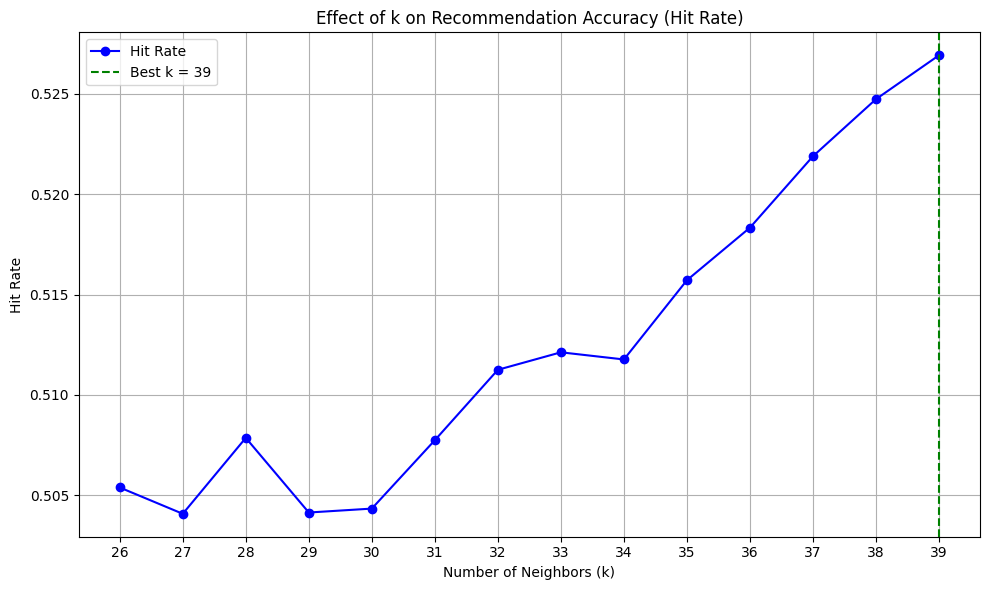

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import numpy as np

# Convert pivot table to sparse matrix
book_sparse = csr_matrix(book_pivot.values)

# Store scores
k_range = list(range(26, 40))  # k = 1 to 23
accuracy_scores = []

# Loop through different k values
for k in k_range:
    model = NearestNeighbors(n_neighbors=k+1, algorithm='brute', metric='cosine')
    model.fit(book_sparse)

    total_hits = 0
    total_tests = 0

    for i in range(100):  # Test on 100 random books
        distances, indices = model.kneighbors(book_sparse[i], n_neighbors=k+1)
        recommended_indices = indices[0][1:]  # Remove the book itself
        actual_index = i

        # If actual_index appears in recommendations of its nearest neighbors
        hits = 0
        for rec_index in recommended_indices:
            if actual_index in model.kneighbors(book_sparse[rec_index], n_neighbors=k+1)[1][0]:
                hits += 1

        total_hits += hits
        total_tests += k

    hit_rate = total_hits / total_tests if total_tests != 0 else 0
    accuracy_scores.append(hit_rate)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='-', color='blue', label='Hit Rate')
best_k = k_range[np.argmax(accuracy_scores)]
plt.axvline(best_k, linestyle='--', color='green', label=f'Best k = {best_k}')
plt.title("Effect of k on Recommendation Accuracy (Hit Rate)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Hit Rate")
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Testing**

In [ ]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )

    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [ ]:
book_name = "2nd Chance"
recommend_book(book_name)

You searched '2nd Chance'

The suggestion books are: 

The Jury
The Vendetta Defense
Move to Strike
Mortal Prey
Blow Fly: A Scarpetta Novel
